<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/Phys824_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conductance and Shot Noise of Pseudodiffusive and Diffusive Electron Transport Through Graphene Nanoribbons
### © Andrew Crossman, University of Delaware
[PHYS824: Nanophysics & Nanotechnology](https://wiki.physics.udel.edu/phys824) 

In [1]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp38-cp38-linux_x86_64.whl size=4293476 sha256=dcd71184610b4d5f1ff83286cd04f3d8e4bba9c390f011621130b97a8f82b4c2
  Stored in directory: /root/.cache/pip/wheels/6f/df/9e/c539998ebc40515fff5ab4a3254a8defafa218f89848e47de8
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp38-cp38-linux_x86_64.whl size=231239 sha256=8de00747cb67e2e78ee9cf6142d7199c3f6ab302173394e6072634eff3ac5c9a
  Stored in directory: /root/.cache/pip/wheels/60/fc/af/bd51765e167af783d7211176ba6da429472161b2462d4d5bc6
Successfully built kwant tinyarray


In [2]:
# Imports
import numpy as np
import kwant 
from kwant.builder import HoppingKind 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [3]:
# If using Google Colab Include
from google.colab import files

## Part I: Semi-infinite ZGNR with Leads

In [4]:
graphene = kwant.lattice.general([[1, 0], [1/2, np.sqrt(3)/2]],  # lattice vectors
                                 [[0, 0], [0, 1/np.sqrt(3)]])  # Coordinates of the sites
a, b = graphene.sublattices
gr_lat = kwant.lattice.honeycomb(a=2.46)
v1, v2 = gr_lat.prim_vecs 
t = -3
gate = 0.5
energy = 0.505

In [130]:
width = 250
length = 1.2 * width

def ribbon_sys(pos):
    x, y = pos
    return abs(x) < 0.5*length and abs(y) < 0.5*width
def ribbon_lead(pos):
    x, y = pos
    return abs(y) < 0.5*width

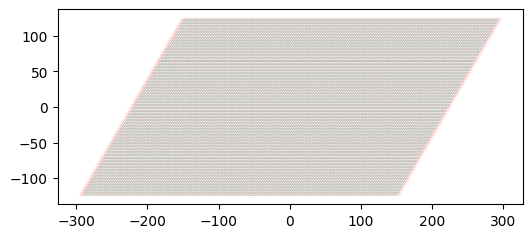

In [131]:
# Make graphene ribbon
sys = kwant.Builder()
sys[gr_lat.shape(ribbon_sys, (0, 0))] = gate
sys[gr_lat.neighbors(1)] = t
# Make leads
left_direction = kwant.TranslationalSymmetry(-v1)
left_lead = kwant.Builder(left_direction)
left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = 0
left_lead[gr_lat.neighbors()] = t
# Attach leads
sys.attach_lead(left_lead)
sys.attach_lead(left_lead.reversed())
kwant.plot(sys, dpi=100);
# Finalize systems
sys = sys.finalized()
left_lead = left_lead.finalized()

Calculate the Conductance (σ) and the Fanofactor for the ZGNR

In [132]:
smatrix = kwant.smatrix(sys, energy)
np.random.seed(2) 
tmat = smatrix.submatrix(1, 0) # transmission from lead 0->1
tt = np.dot(tmat, tmat.conj().T)
evals = np.linalg.eigvals(tt)
print(evals)
num = 0
den = 0
for x in evals:
  den = den + x
  num = num + x*(1-x)
conductance = den.real # from lead 0->1
fano = (num/den).real
print(round(conductance,5), round(fano,5))

[ 1.46225022e-02-2.17963898e-19j  1.45081212e-02-3.54485418e-19j
  3.55532232e-06-1.50228126e-19j  3.53108205e-06+4.61832943e-20j
  1.05537924e-09-5.44513263e-19j  1.04009081e-09-3.46054216e-19j
  2.06446890e-13-1.36128114e-19j  1.89402681e-13-1.27548809e-20j
  2.27689249e-17-7.74205149e-20j  2.01177217e-17+1.11995245e-19j
  1.56055145e-19-6.59158985e-21j -1.37847505e-20+2.42600461e-20j]
0.02914 0.98544


In [145]:
L_over_W = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
w50_Gs = np.array([0.44625, 0.04479, 0.0075, 0.00181, 0.00052, 0.00016])
w50_fanos = np.array([0.77678, 0.97717, 0.99623, 0.99909, 0.99973, 0.99992])
w100_Gs = np.array([1.76955, 1.14349, 1.03146, 0.99776, 1.0027, 0.98913])
w100_fanos = np.array([0.28014, 0.12608, 0.03824, 0.02145, 0.0027, 0.01237])
w150_Gs = np.array([2.04784, 0.9565, 0.42705, 0.16852, 0.06083, 0.01852])
w150_fanos = np.array([0.31888, 0.54993, 0.78838, 0.91582, 0.96957, 0.99074])
w200_Gs = np.array([2.32466, 1.0769, 0.4904, 0.19118, 0.07065, 0.02391])
w200_fanos = np.array([0.32202, 0.51856, 0.76076, 0.90489, 0.96469, 0.98805])
w250_Gs = np.array([2.50721, 1.17691, 0.56847, 0.23057, 0.08589, 0.02914])
w250_fanos = np.array([0.3329, 0.48867, 0.7236, 0.88531, 0.95709, 0.98544])
w50_conds = w50_Gs*L_over_W
w100_conds = w100_Gs*L_over_W
w150_conds = w150_Gs*L_over_W
w200_conds = w200_Gs*L_over_W
w250_conds = w250_Gs*L_over_W

Plot Conductances (G) as a function of L/W

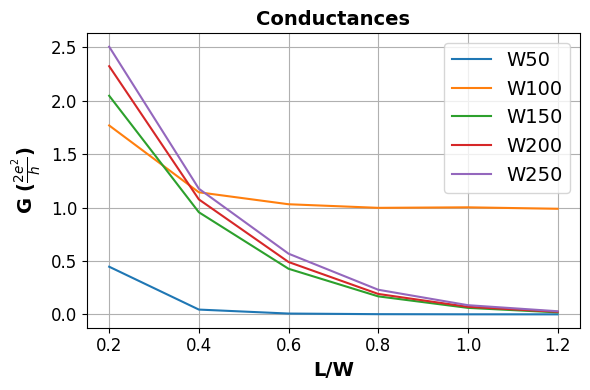

In [141]:
fig, ax = plt.subplots(dpi =100, figsize=(6,4))
ax.plot(L_over_W, w50_Gs, label='W50');
ax.plot(L_over_W, w100_Gs, label='W100');
ax.plot(L_over_W, w150_Gs, label='W150');
ax.plot(L_over_W, w200_Gs, label='W200');
ax.plot(L_over_W, w250_Gs, label='W250');
ax.set_title('Conductances', fontsize=14, fontweight='bold')
ax.set_xlabel('L/W', fontsize=14, fontweight='bold')
ax.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize=14)
ax.grid()
plt.tight_layout()
#plt.savefig('EnergyPerAtomVBLD.png')
#files.download('EnergyPerAtomVBLD.png')

Plot Fano Factors (F) as a function of W/L

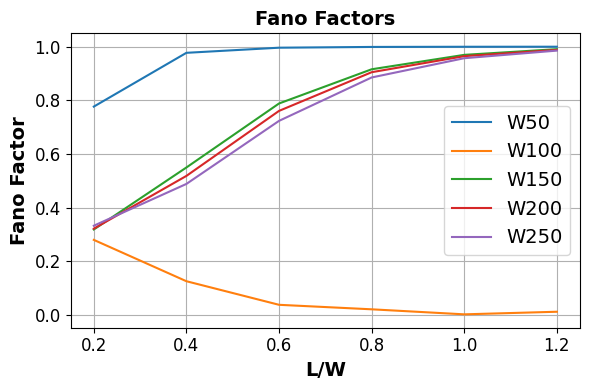

In [142]:
fig1, ax1 = plt.subplots(dpi =100, figsize=(6,4))
ax1.plot(L_over_W, w50_fanos, label='W50')
ax1.plot(L_over_W, w100_fanos, label='W100')
ax1.plot(L_over_W, w150_fanos, label='W150')
ax1.plot(L_over_W, w200_fanos, label='W200')
ax1.plot(L_over_W, w250_fanos, label='W250')
ax1.set_title('Fano Factors', fontsize=14, fontweight='bold')
ax1.set_xlabel('L/W', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'Fano Factor', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.legend(fontsize=14)
ax1.grid()
plt.tight_layout()
#plt.savefig('EnergyPerAtomVBLD.png')
#files.download('EnergyPerAtomVBLD.png')

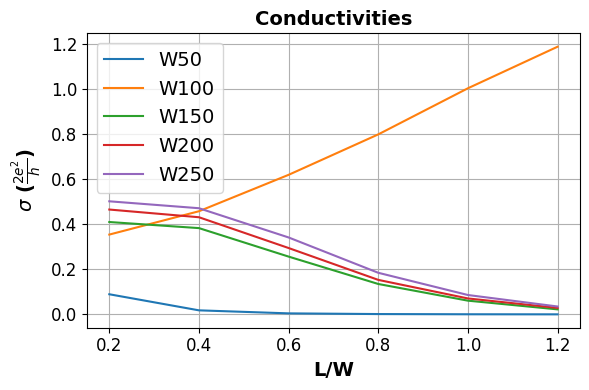

In [147]:
fig, ax = plt.subplots(dpi =100, figsize=(6,4))
ax.plot(L_over_W, w50_conds, label='W50');
ax.plot(L_over_W, w100_conds, label='W100');
ax.plot(L_over_W, w150_conds, label='W150');
ax.plot(L_over_W, w200_conds, label='W200');
ax.plot(L_over_W, w250_conds, label='W250');
ax.set_title('Conductivities', fontsize=14, fontweight='bold')
ax.set_xlabel('L/W', fontsize=14, fontweight='bold')
ax.set_ylabel(r'$\sigma$ ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize=14)
ax.grid()
plt.tight_layout()
#plt.savefig('EnergyPerAtomVBLD.png')
#files.download('EnergyPerAtomVBLD.png')

In [148]:
def Q1(width, length):
  # Make graphene ribbon
  sys = kwant.Builder()
  sys[gr_lat.shape((lambda pos: abs(pos[0])<0.5*length and abs(pos[1])<0.5*width), (0, 0))] = gate
  sys[gr_lat.neighbors(1)] = t
  # Make leads
  left_direction = kwant.TranslationalSymmetry(-v1)
  left_lead = kwant.Builder(left_direction)
  left_lead[gr_lat.shape( (lambda pos: abs(pos[1])<0.5*width), (0, 0))] = 0
  left_lead[gr_lat.neighbors()] = t
  # Attach leads
  sys.attach_lead(left_lead)
  sys.attach_lead(left_lead.reversed())
  kwant.plot(sys, dpi=100);
  # Finalize systems
  sys = sys.finalized()
  left_lead = left_lead.finalized()

  smatrix = kwant.smatrix(sys, energy) 
  tmat = smatrix.submatrix(1, 0) # transmission from lead 0->1
  tt = np.dot(tmat, tmat.conj().T)
  evals = np.linalg.eigvals(tt)
  num = 0
  den = 0
  for x in evals:
    den = den + x
    num = num + x*(1-x)
  conductance = den.real # from lead 0->1
  fanofactor = (num/den).real
  conductivity = conductance * length/width
  return conductance, conductivity, fanofactor

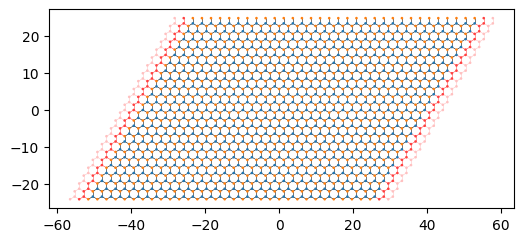

(0.0005240384780432037, 0.0005240384780432037, 0.9997334957075241)


In [157]:
Widths = [50,100,150,200,250]
Lengths = np.linspace(1, 150, num=15, endpoint=True)
a = Q1(50,50)
print(a)